# BMI Classification

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the data
bmi = pd.read_csv('C:\\Users\\dell\\Desktop\\bmi.csv')
bmi.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


### Basic EDA

In [3]:
bmi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [4]:
bmi.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [5]:
bmi.isna().sum()

Gender    0
Height    0
Weight    0
Index     0
dtype: int64

In [7]:
for col in bmi.columns:
    print(col, ':', bmi[col].unique())
    print()

Gender : ['Male' 'Female']

Height : [174 189 185 195 149 147 154 169 159 192 155 191 153 157 140 144 172 151
 190 187 163 179 178 160 197 171 175 161 182 188 181 168 176 196 164 143
 141 193 194 180 165 166 186 198 145 183 177 170 142 199 150 146 148 184
 158 167 156 162 173 152]

Weight : [ 96  87 110 104  61  92 111  90 103  81  80 101  51  79 107 129 145 139
 149  97  67  64  95  62 159 152 121  52  65 131 153 132 114 120 108  56
 118 126  76 122  72 135  54 105 116  89 127  70  88 143  83 158  59  82
 136 117  75 100 154 140 123  50 141 119 156  69 155 160 106  66 157  60
  57 138 115 151 150 147 124  85 125 146  98  84 102  99  78 109  94  74
  73 134 137 144  93  86 130  58 148  68  71  63  91 142 133  77 128 112
  55  53]

Index : [4 2 3 5 1 0]



In [8]:
bmi['BMI'] = round(bmi['Weight']/(bmi['Height']/100)**2, 2)
bmi.head()

,Gender,Height,Weight,Index,BMI
0,Male,174,96,4,31.71
1,Male,189,87,2,24.36
2,Female,185,110,4,32.14
3,Female,195,104,3,27.35
4,Male,149,61,3,27.48


### Basic Visualization

<AxesSubplot:title={'center':'500 people index and bmi'}, xlabel='Index', ylabel='BMI'>

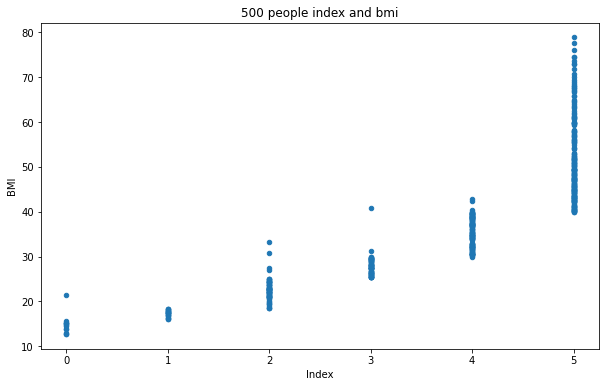

In [9]:
bmi.plot(x='Index', y='BMI', kind='scatter', figsize=(10,6), title='500 people index and bmi')

In [10]:
# Creating a bmi status group
def status(x):
    if x['Index'] == 0:
        return 'Underweight'
    elif x['Index'] == 1:
        return 'Normal weight'
    elif x['Index'] == 2:
        return 'Pre-Obesity'
    elif x['Index'] == 3:
        return 'Obese Class I'
    elif x['Index'] == 4:
        return 'Obese Class II'
    elif x['Index'] == 5:
        return 'Obese Class III'

bmi['Status'] = bmi.apply(status, axis=1)
bmi.head()

,Gender,Height,Weight,Index,BMI,Status
0,Male,174,96,4,31.71,Obese Class II
1,Male,189,87,2,24.36,Pre-Obesity
2,Female,185,110,4,32.14,Obese Class II
3,Female,195,104,3,27.35,Obese Class I
4,Male,149,61,3,27.48,Obese Class I


In [12]:
corr_matrix = bmi.corr().abs()
upper_triangle_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool))
upper_triangle_matrix

C:\Users\dell\AppData\Local\Temp\ipykernel_10788\892937447.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_triangle_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool))


,Height,Weight,Index,BMI
Height,NaN,0.000446,0.422223,0.531997
Weight,NaN,NaN,0.804569,0.827024
Index,NaN,NaN,NaN,0.853614
BMI,NaN,NaN,NaN,NaN


<AxesSubplot:>

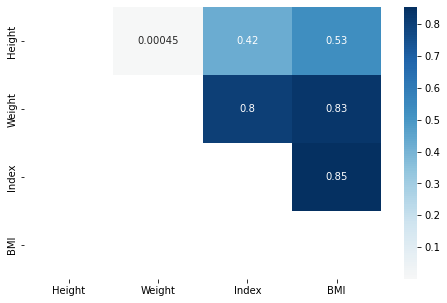

In [13]:
plt.subplots(figsize=(8,5))
sns.heatmap(upper_triangle_matrix, cmap='RdBu', annot=True, center = 0)

C:\Users\dell\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


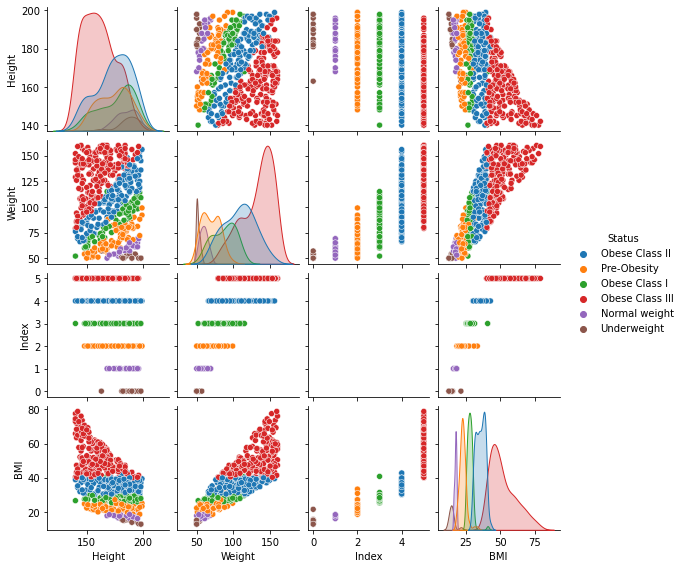

In [14]:
sns.pairplot(bmi, hue='Status', size=2)

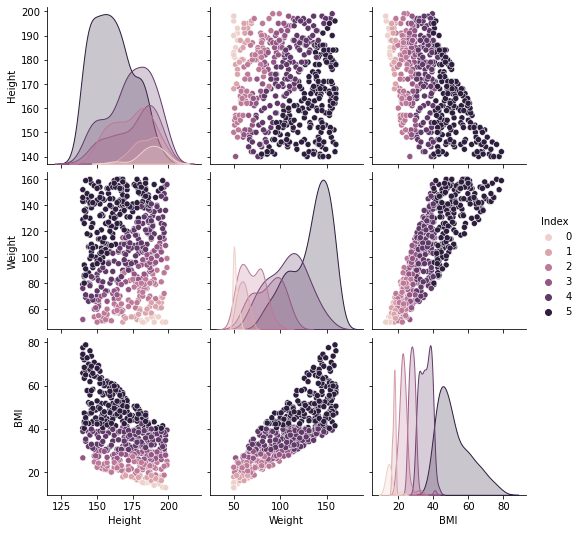

In [15]:
sns.pairplot(bmi, hue='Index')
plt.show()

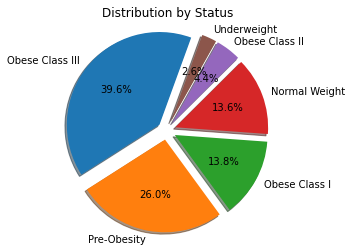

In [23]:
label = 'Obese Class III', 'Pre-Obesity', 'Obese Class I', 'Normal Weight', 'Obese Class II', 'Underweight'
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1)
sizes = bmi['Status'].value_counts(normalize=True)*100

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=label, autopct='%1.1f%%', shadow=True, startangle=70)
ax1.axis('equal')
plt.title('Distribution by Status')
plt.rcParams['figure.figsize'] = [5,5]
plt.show()

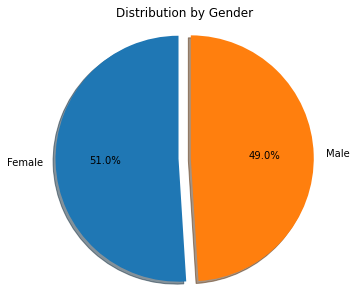

In [22]:
label = 'Female', 'Male'
explode = (0, 0.1)
sizes = bmi['Gender'].value_counts(normalize=True)*100

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=label, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Distribution by Gender')
plt.rcParams['figure.figsize'] = [4,4]
plt.show()

Text(0.5, 0.98, 'Height Distribution of People')

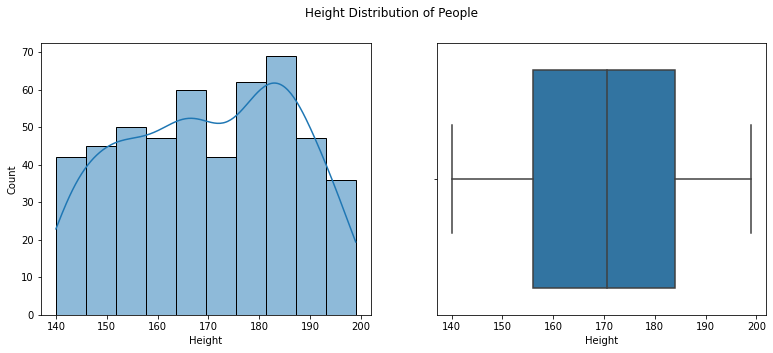

In [24]:
fig, ax = plt.subplots(1,2,figsize=(13,5))
sns.histplot(bmi['Height'], kde=True, ax=ax[0])
sns.boxplot(x='Height', data=bmi, ax=ax[1])
plt.suptitle('Height Distribution of People')

### Machine Learning Model (K-Neighbours)

In [25]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [26]:
# Defining X and Y for training and testing data
X = bmi.drop(['Index', 'Gender', 'Status'], axis=1)
Y = bmi['Index']

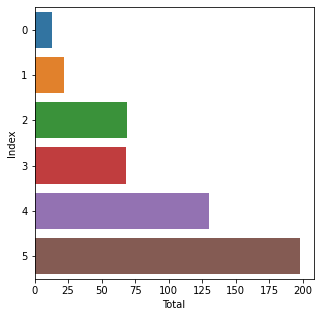

In [27]:
sns.countplot(y=Y, data=bmi)
plt.ylabel('Index')
plt.xlabel('Total')
plt.show()

In [28]:
X = MinMaxScaler().fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

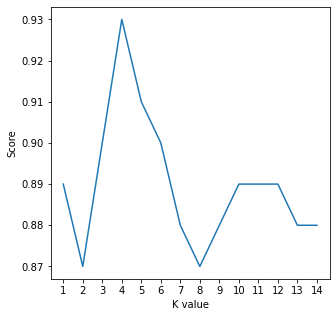

KNN best accuracy: 93.00%


In [29]:
knn = []
for i in range (1,15):
    KN = KNeighborsClassifier(n_neighbors=i)
    KN.fit(X_train, Y_train)
    knn.append(KN.score(X_test, Y_test))
    
plt.plot(range(1,15), knn)
plt.xticks(np.arange(1,15,1))
plt.xlabel('K value')
plt.ylabel('Score')
plt.show()
KNAcc = max(knn)
print('KNN best accuracy: {:.2f}%'.format(KNAcc*100))